In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from astropy.io import ascii


In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_cosmoDC2/mag_i/w_rich/"

In [3]:
cdc_mb = Table.read(inpath + 'c2_p_members.fits')

In [4]:
cdc_mb

id,id_cluster,ra,dec,z,pmem,mag_g,mag_r,mag_i,mag_z,mag_y,ind_cl
bytes21,bytes21,float64,float64,float64,float64,float32,float32,float32,float32,float32,int64
1250000075,1600020475,50.775875822529436,-27.112584328955446,0.04530489444732666,1.0,14.869303,14.04137,13.667305,13.402172,13.204416,0
1250000078,1600020475,50.77998995907118,-27.107323598441102,0.04530489444732666,1.0,15.914692,15.077406,14.644449,14.309507,14.119247,0
1250000079,1600020475,50.95558315405602,-27.100375281860327,0.04530489444732666,1.0,18.039742,17.265564,16.901432,16.65677,16.48743,0
1250000080,1600020475,50.82368075669441,-27.152891726801627,0.04530489444732666,1.0,17.376867,16.799938,16.517538,16.34986,16.230026,0
1250000081,1600020475,50.90345948560671,-27.10331267498605,0.04530489444732666,1.0,16.36197,15.952614,15.7148075,15.551985,15.428093,0
1250000084,1600020475,50.73752031959006,-27.137772423229062,0.04530489444732666,1.0,16.757736,15.944899,15.564093,15.298132,15.104336,0
1250000086,1600020475,50.70632699671811,-27.150415495632586,0.04530489444732666,1.0,17.942202,17.174496,16.81572,16.574202,16.410166,0
1250000099,2700020475,49.466814189348334,-25.960541211222015,0.04615640640258789,1.0,15.445793,14.616352,14.242224,13.977728,13.779514,1
1250000101,2700020475,49.36152268516141,-25.983754210597972,0.04615640640258789,1.0,16.939217,16.417784,16.146242,15.978891,15.884966,1


In [5]:
am_mb = Table.read(inpath + 'c1_p_members.fits')

In [6]:
cosmo_values = ascii.read('/sps/lsst/users/tguillem/DESC/desc_may_2021/desc-data-portal/notebooks/dc2/magstar_files/istar.asc')
cosmo_values.rename_column('col1', 'z')
cosmo_values.rename_column('col2', 'mag_i')

In [7]:
cosmo_values

z,mag_i
float64,float64
0.02,5.2331
0.03,13.6808
0.04,14.2076
0.05,14.7344
0.06,15.2612
0.07,15.6417
0.08,15.9127
0.09,16.1837
0.1,16.4546


In [8]:
zeros1 = np.zeros(12)
zeros2 = np.zeros(13)

In [9]:
cdc_mb_c = Table(zeros1, names = ('id', 'id_cluster', 'ra', 'dec', 'z', 'pmem', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'ind_cl'))
am_mb_c = Table(zeros2, names = ('id', 'id_cluster', 'ra', 'dec', 'z', 'pmem', 'lambstar', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'ind_cl'))

In [13]:
cdc_mb['id_cluster'] = cdc_mb['id_cluster'].astype(int)
cdc_mb['id'] = cdc_mb['id'].astype(int)

In [14]:
am_mb['id'] = am_mb['id'].astype(int)
am_mb['id_cluster'] = am_mb['id_cluster'].astype(int)

In [15]:
for i in range(len(cosmo_values['z'])-1):
    z_min = cosmo_values['z'][i]
    z_max = cosmo_values['z'][i+1]
    mag_i_max = cosmo_values['mag_i'][i] + 2
    cdt1 = cdc_mb[(cdc_mb['z']<z_max)*(cdc_mb['z']>z_min)*(cdc_mb['mag_i']<mag_i_max)]
    cdt2 = am_mb[(am_mb['z']<z_max)*(am_mb['z']>z_min)*(am_mb['mag_i']<mag_i_max)]
    cdc_mb_c = vstack([cdc_mb_c, cdt1])
    am_mb_c = vstack([am_mb_c, cdt2])


KeyboardInterrupt



In [13]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['z']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(cdc_mb_c['z'], cdc_mb_c['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]])
density = n_gal/439.78986

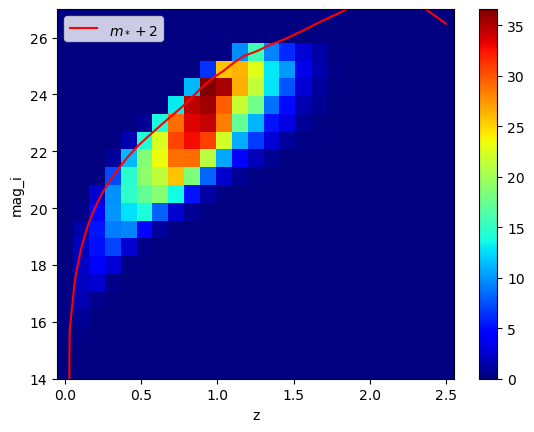

In [14]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values['z'], cosmo_values['mag_i'] + 2, color = 'r', label = '$m_* + 2$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

In [15]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['z']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(am_mb_c['z'], am_mb_c['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]], weights = am_mb_c['pmem'])
density = n_gal/439.78986

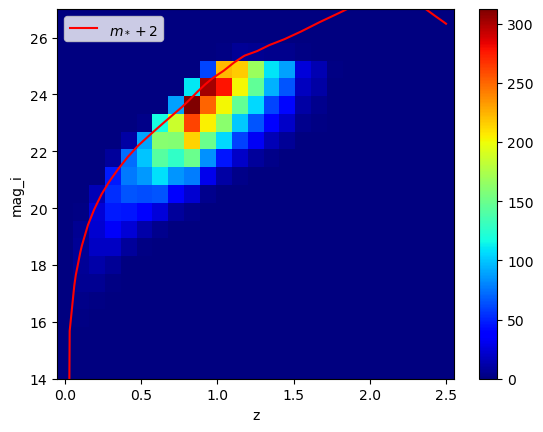

In [16]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values['z'], cosmo_values['mag_i'] + 2, color = 'r', label = '$m_* + 2$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

2351.9025822007097 611.0 1046.2256455501774
Plotting...
3809.865765401162 873.0 1607.2164413502906
Plotting...
9765.195453489665 1658.0 3684.7988633724162
Plotting...
6158.656335107051 705.0 2068.4140837767627
Plotting...
8142.395815686788 647.0 2520.848953921697
Plotting...
605.528102779761 69.0 203.13202569494024
Plotting...


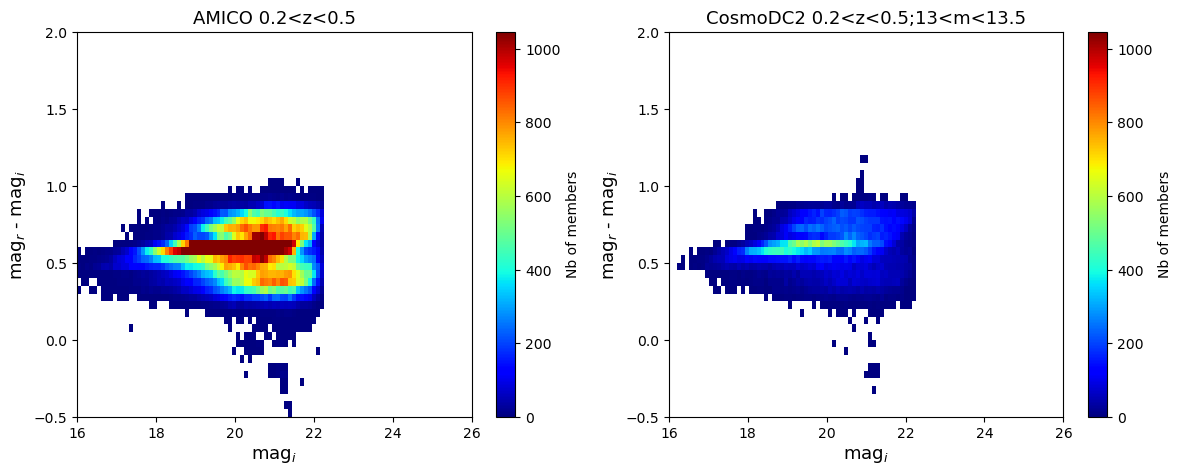

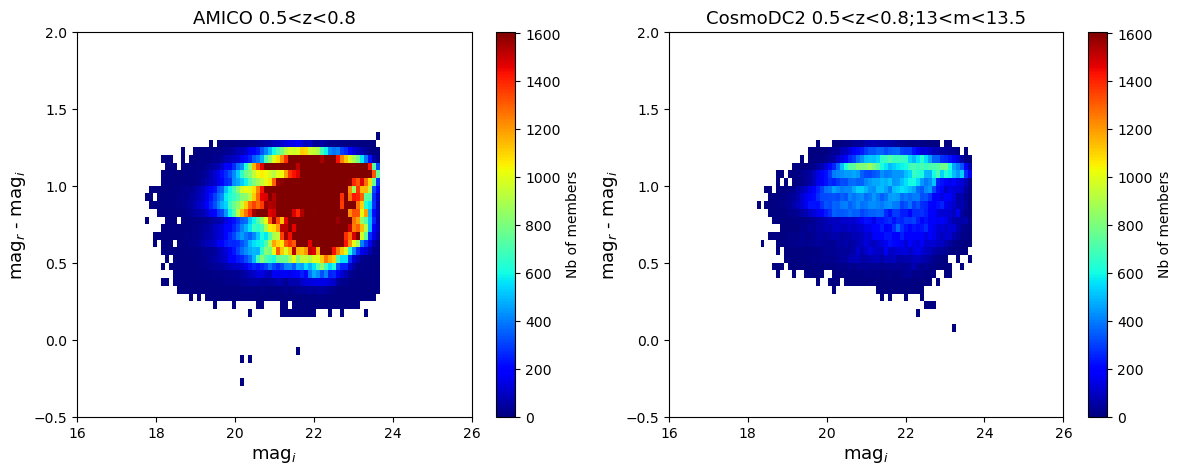

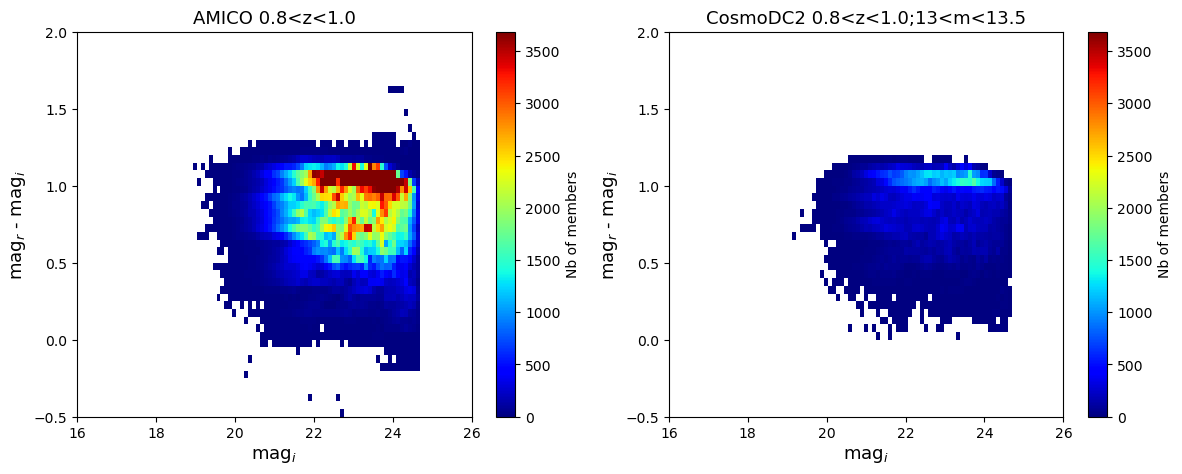

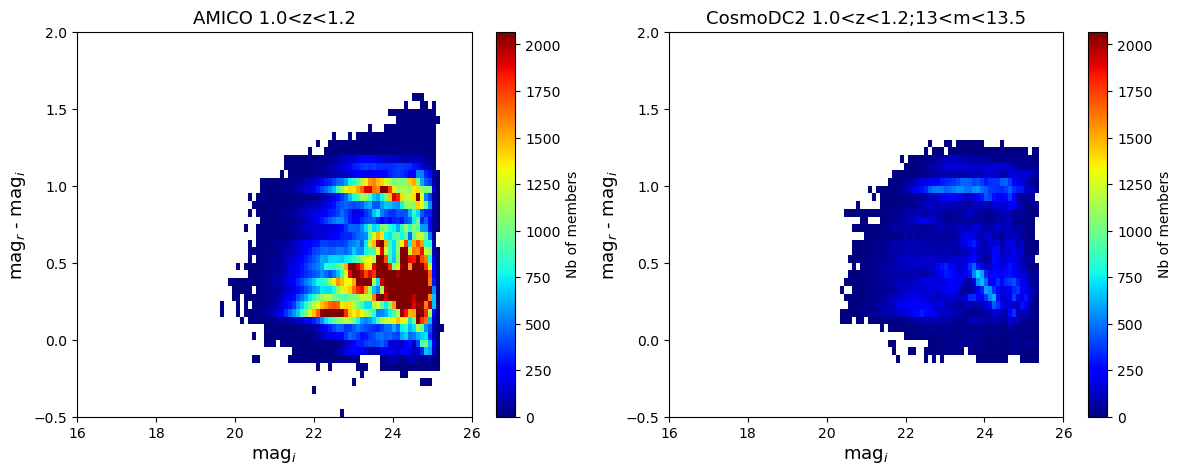

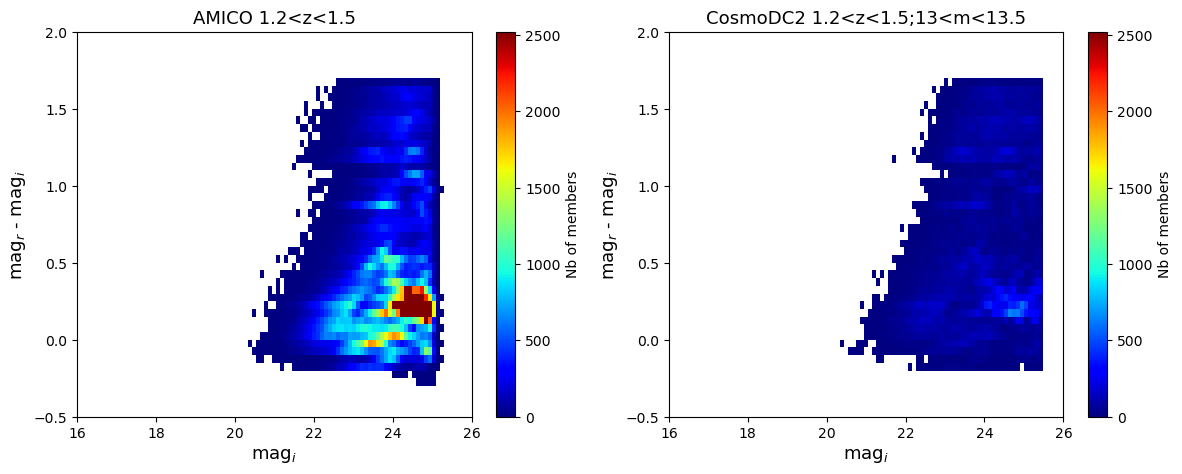

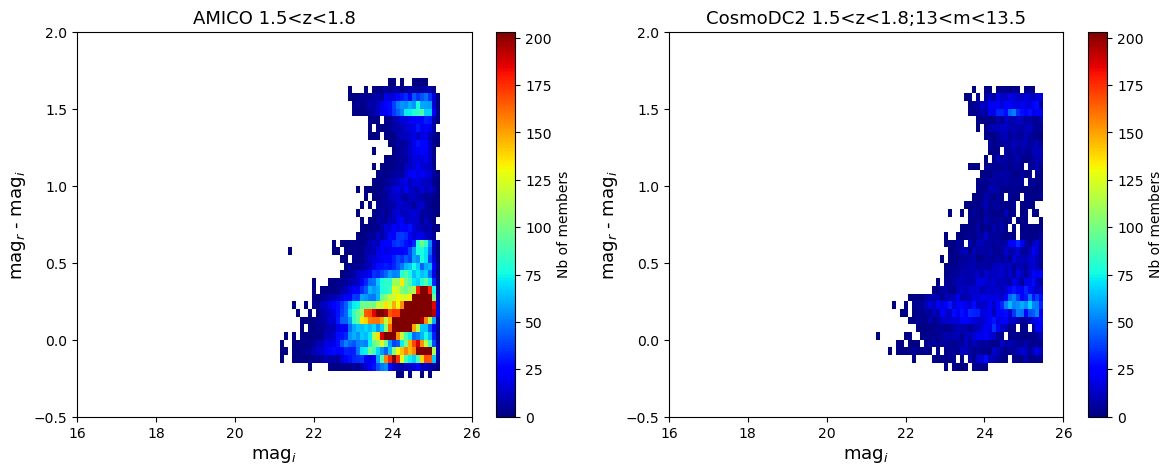

In [17]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,26,100)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = np.histogram2d(am_mb_cdt['mag_i'], am_mb_delt, bins = (x_bins,y_bins), weights = am_mb_cdt['pmem'])
        cdc_hist = np.histogram2d(cdc_mb_cdt['mag_i'], cdc_mb_delt, bins = (x_bins,y_bins))
        am_hist = am_hist[0]
        cdc_hist = cdc_hist[0]
        vmax1 = np.max(am_hist)
        vmax2 = np.max(cdc_hist)
        vmax = (vmax1 + 3*vmax2)/4
        print(vmax1, vmax2, vmax)
        am_hist[am_hist==0] = np.nan
        cdc_hist[cdc_hist==0] = np.nan

        x, y = np.meshgrid(x_bins, y_bins)
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
        print('Plotting...')
        c = ax1.pcolormesh(x, y, am_hist.T, cmap='jet', vmin=0, vmax = vmax)
        ax1.set_xlabel('mag$_i$', fontsize = 13)
        ax1.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
        ax1.set_title('AMICO ' + str(z_min) + '<z<' + str(z_max), fontsize = 13)
        cc1 = ax2.pcolormesh(x, y, cdc_hist.T, cmap='jet', vmin=0, vmax = vmax)
        ax2.set_xlabel('mag$_i$', fontsize = 13)
        ax2.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
        ax2.set_title('CosmoDC2 ' + str(z_min) + '<z<' + str(z_max) + ';' + str(m_min) + '<m<' + str(m_max), fontsize = 13)
        ax1.set_xlim([16,26])
        ax1.set_ylim([-.5,2])
        ax2.set_xlim([16,26])
        ax2.set_ylim([-.5,2])
        fig.colorbar(c, ax=ax1, label = 'Nb of members')
        fig.colorbar(cc1, ax=ax2, label = 'Nb of members')
        plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/amico_cosmoDC2/mag_i/p_matching/dmagvsmag/w_rich/m_star_' + str(z_min) + '-' + str(z_max) + '_' + str(m_min) + '-' + str(m_max) + '.png')

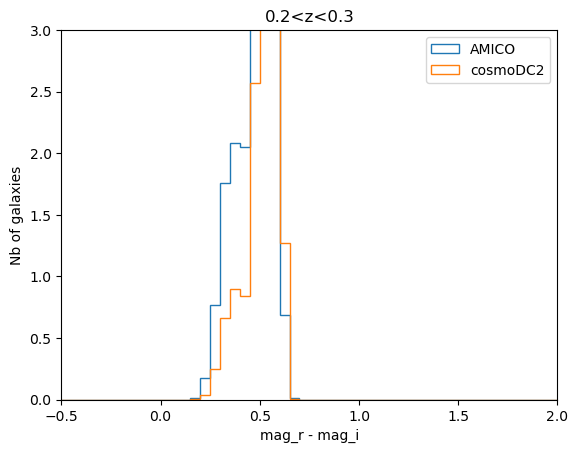

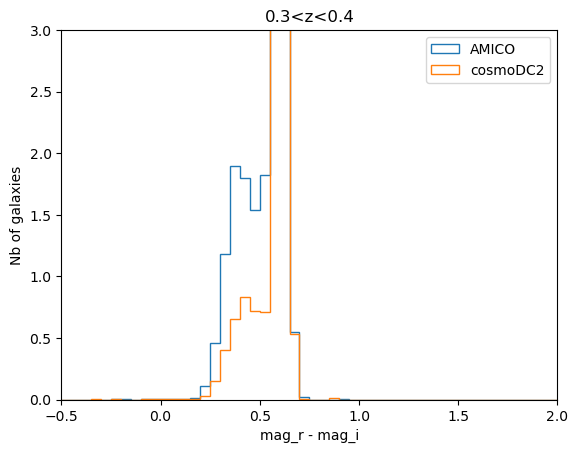

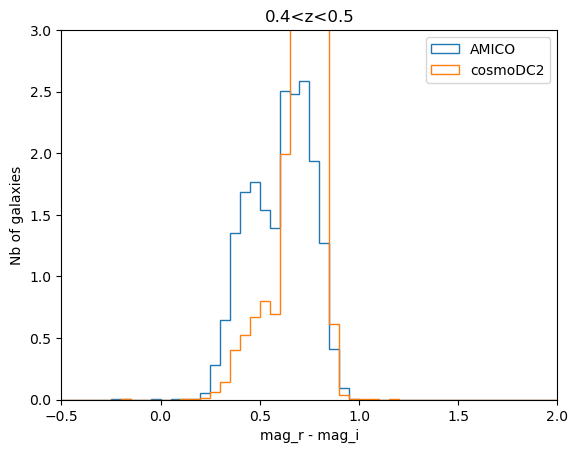

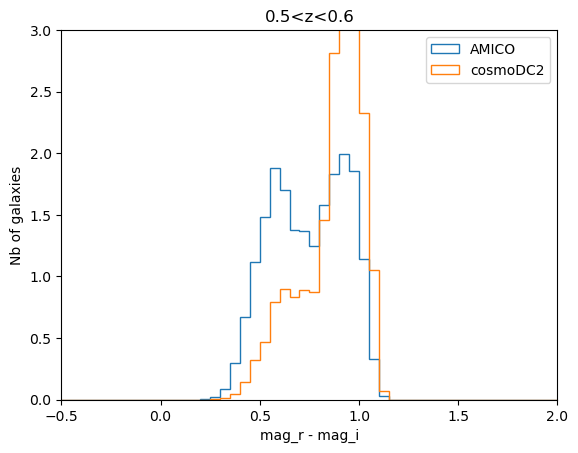

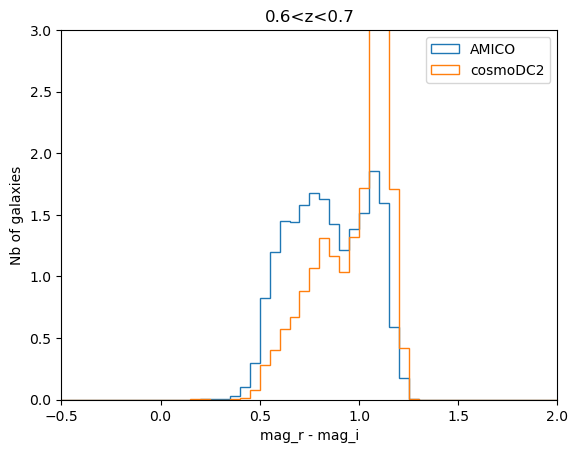

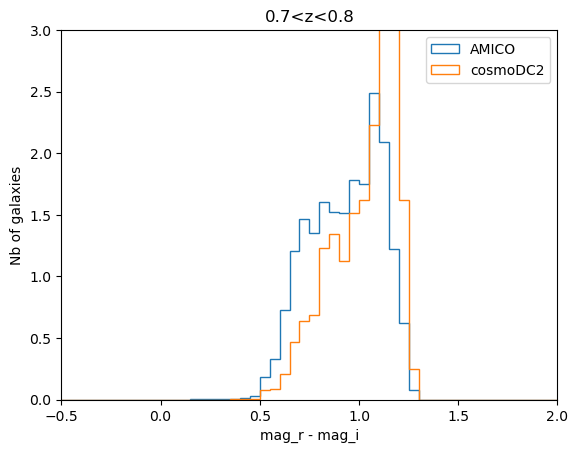

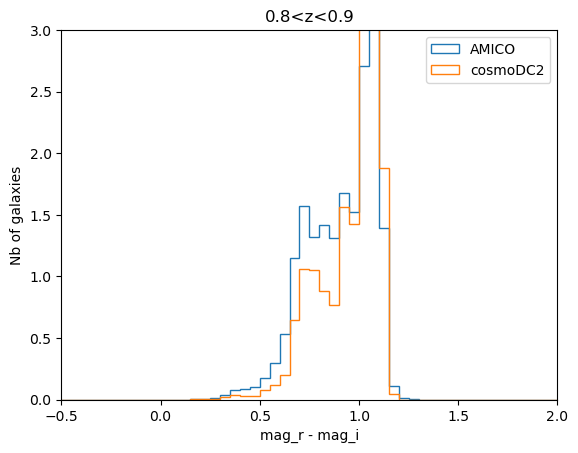

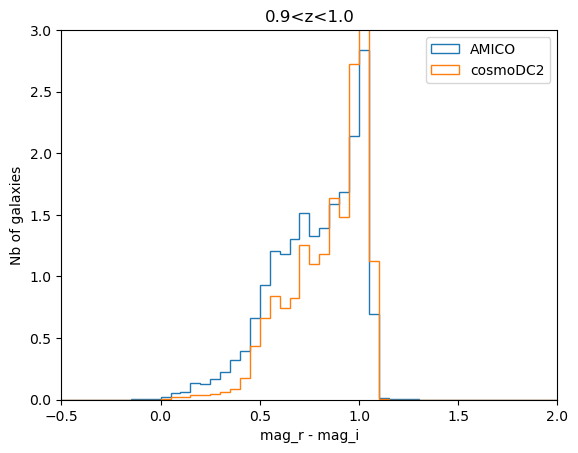

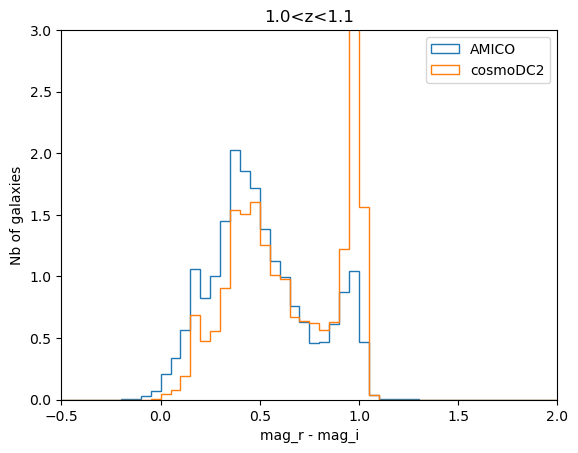

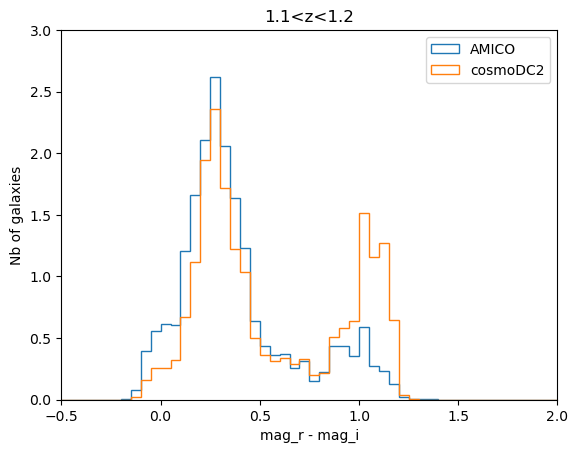

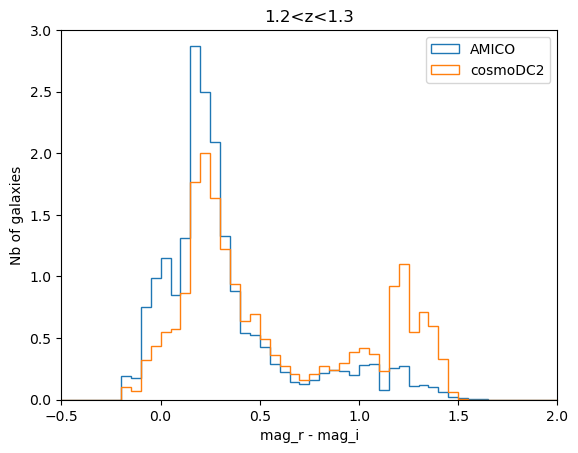

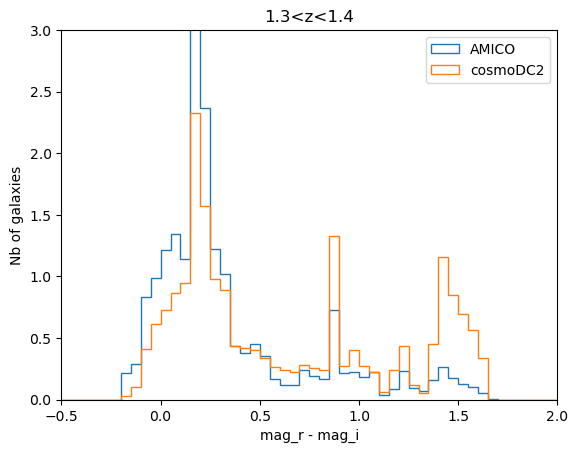

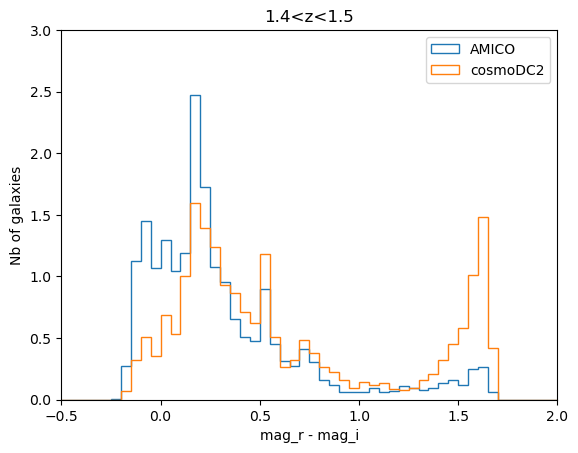

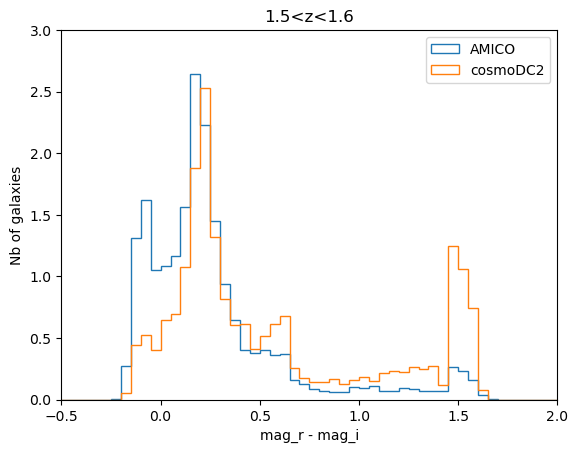

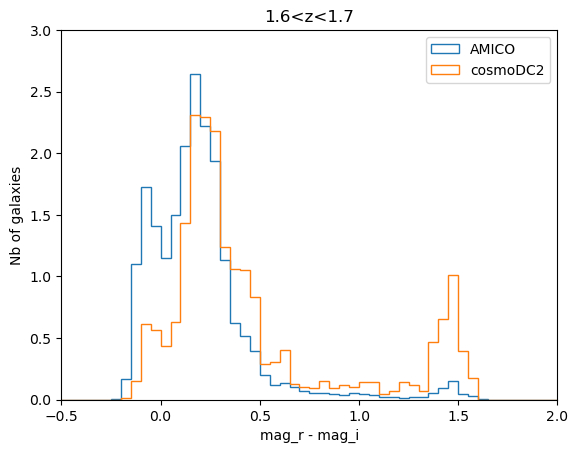

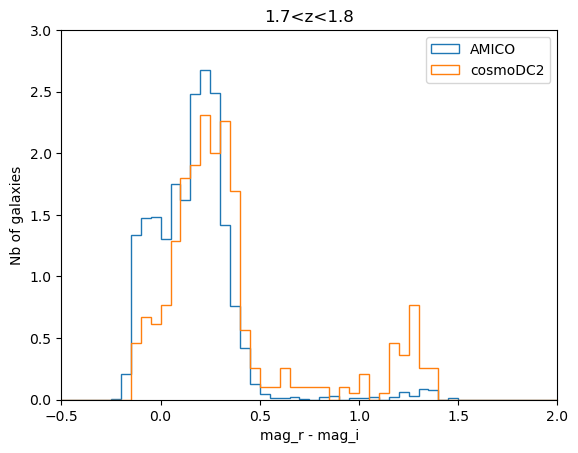

In [18]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,26,100)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO', density = True)#, weights = am_mb_cdt['pmem'])
        cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.ylim([0,3])
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

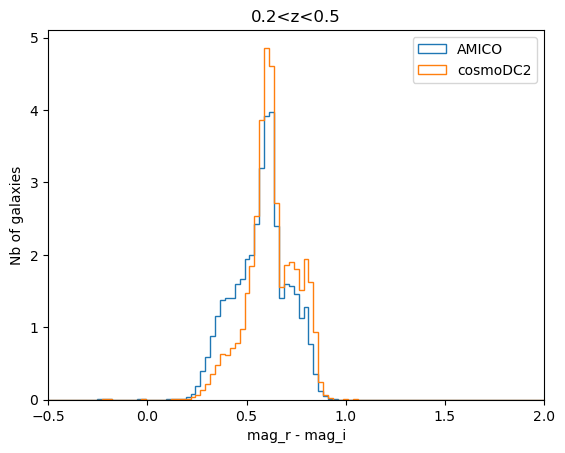

Les moyennes sont :0.5536420765175168	0.6232765128528855
Les déviations standards sont :0.00014207458868609863	0.0005000982472594255
La Z-value est-133.94124797504134


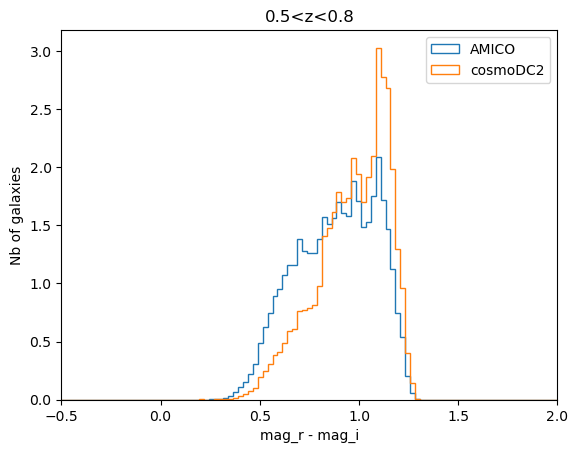

Les moyennes sont :0.8603089037758314	0.9668885189101597
Les déviations standards sont :0.00011995370444583137	0.00045795436077034567
La Z-value est-225.13471966609913


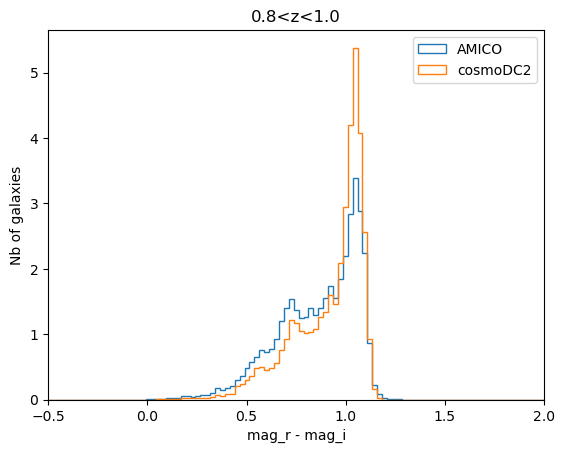

Les moyennes sont :0.8488112979964345	0.9167309432848276
Les déviations standards sont :9.882006501514703e-05	0.00045415756297684674
La Z-value est-146.1315219896836


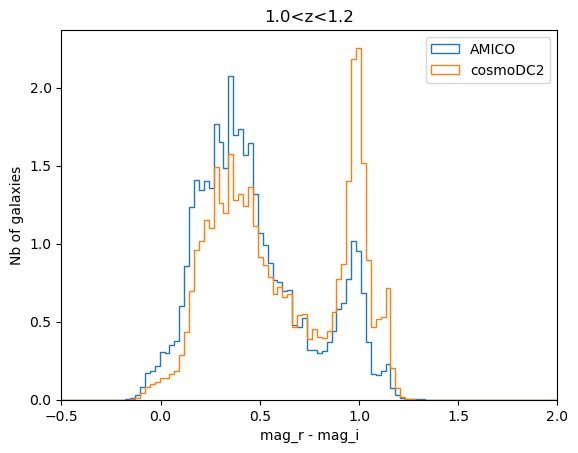

Les moyennes sont :0.4560697881507804	0.6041521018775131
Les déviations standards sont :0.00015561471437085023	0.000931633478424603
La Z-value est-156.77708225224006


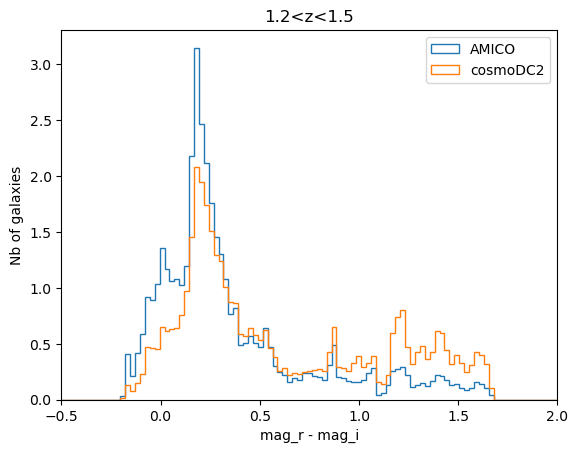

Les moyennes sont :0.32943992572474823	0.5992746001929182
Les déviations standards sont :0.00028468659521248193	0.0017817554974890065
La Z-value est-149.54628418884036


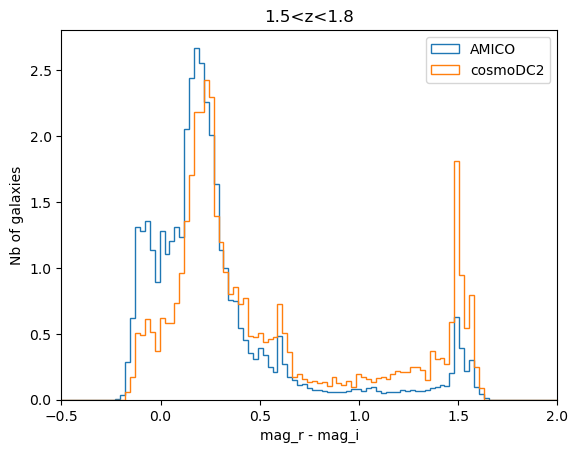

Les moyennes sont :0.24233796771638885	0.529673777694562
Les déviations standards sont :0.0009572688672993565	0.005875245248190438
La Z-value est-48.26967003327427


In [19]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,26,100)
        y_bins = np.linspace(-0.5,2,102)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO', density = True, weights = am_mb_cdt['pmem'])
        cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()
        mu1, mu2 = np.mean(am_mb_delt), np.mean(cdc_mb_delt)
        s1, s2 = np.std(am_mb_delt)/np.sqrt(len(am_mb_delt)), np.std(cdc_mb_delt)/np.sqrt(len(cdc_mb_delt))
        Z = (mu1-mu2)/(np.sqrt(s1**2 + s2**2))
        print('Les moyennes sont :' + str(mu1) + '\t' + str(mu2) + '\nLes déviations standards sont :' + str(s1) + '\t' + str(s2) + '\nLa Z-value est' + str(Z))

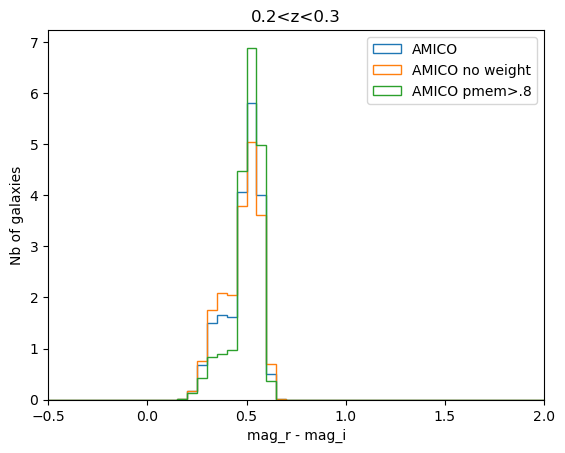

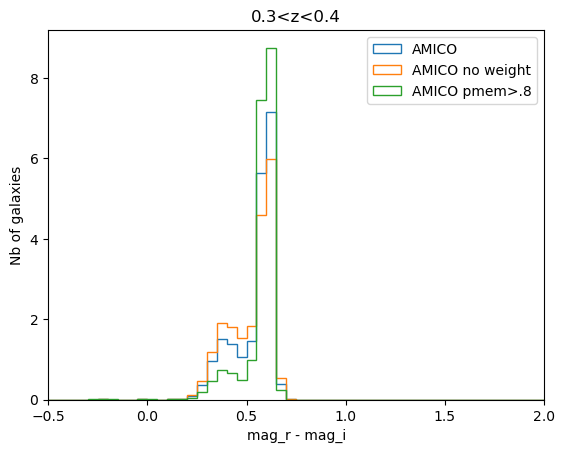

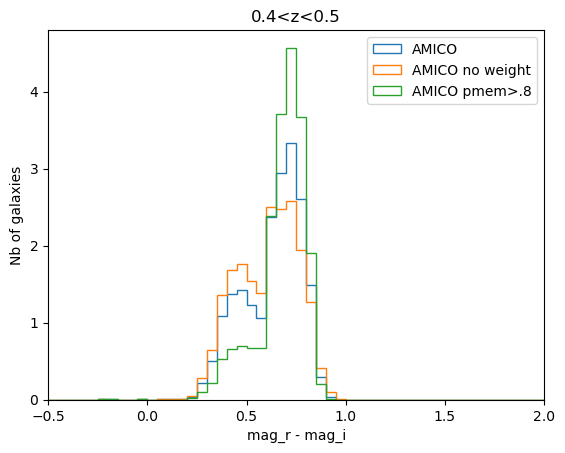

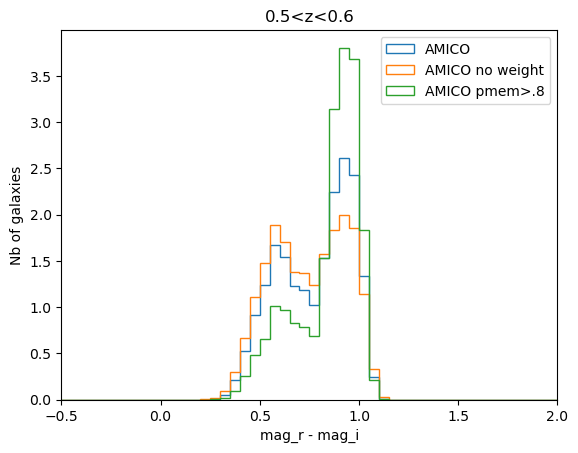

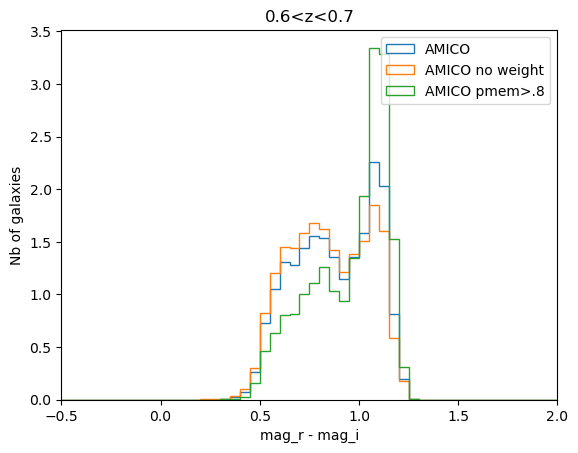

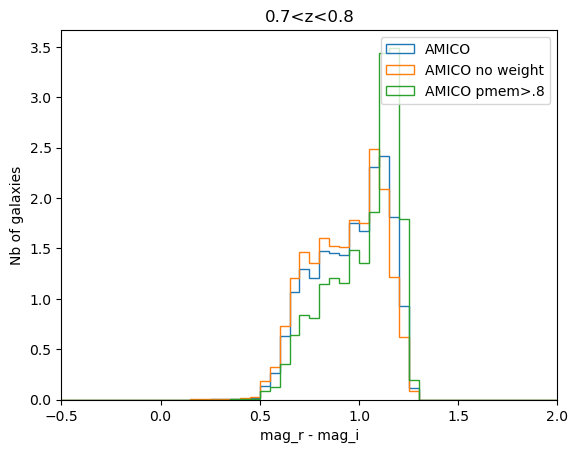

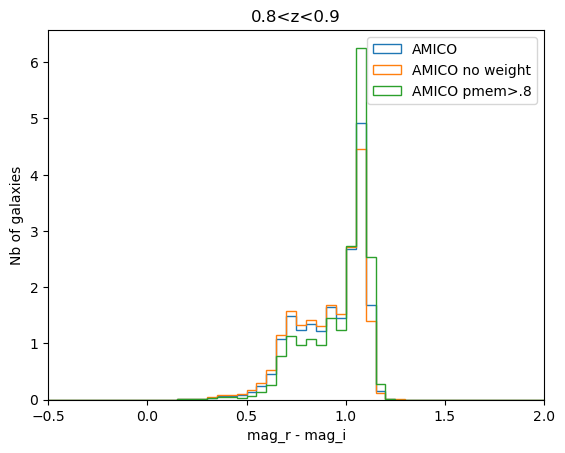

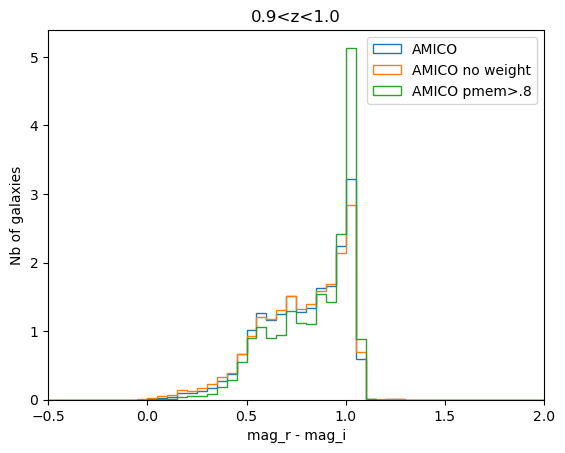

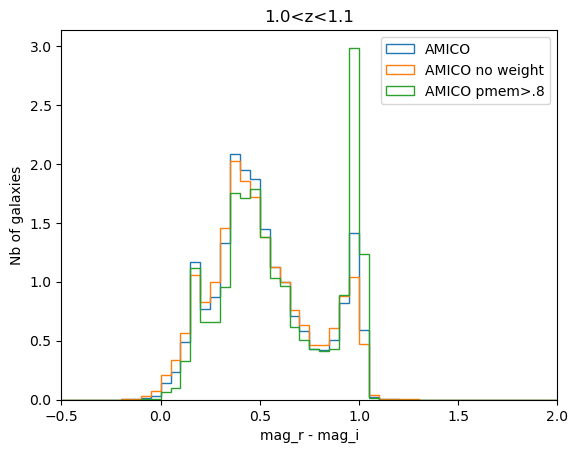

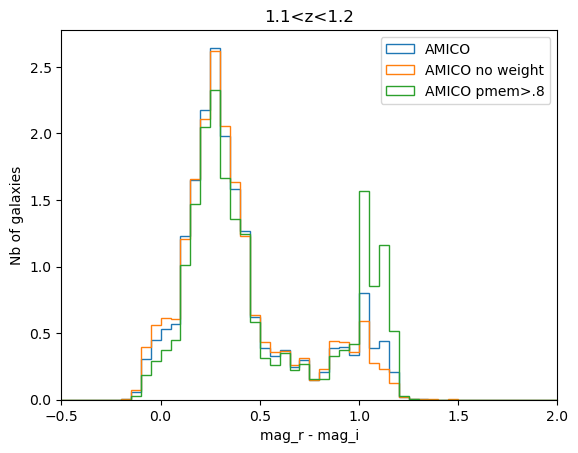

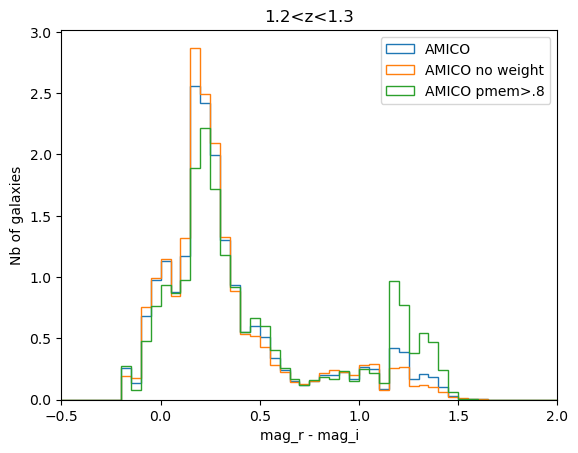

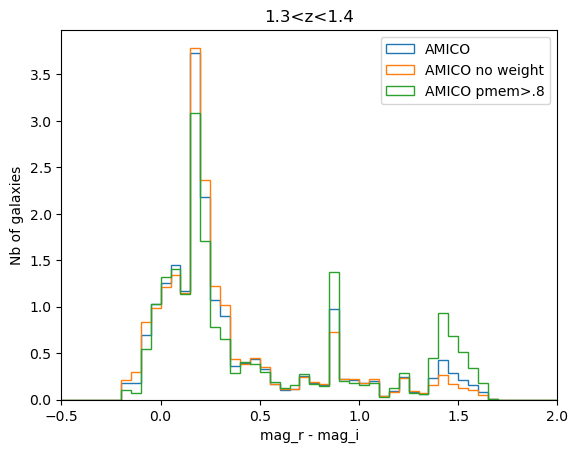

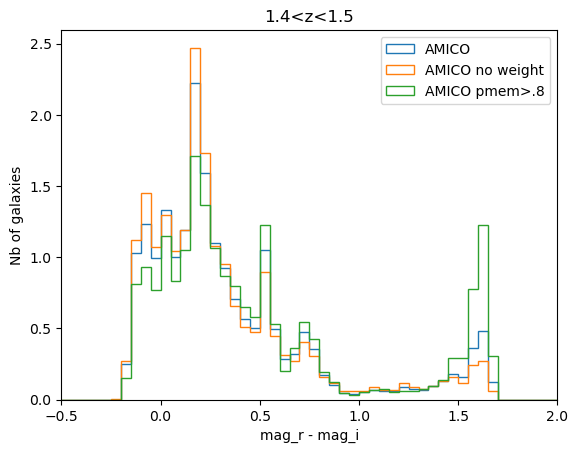

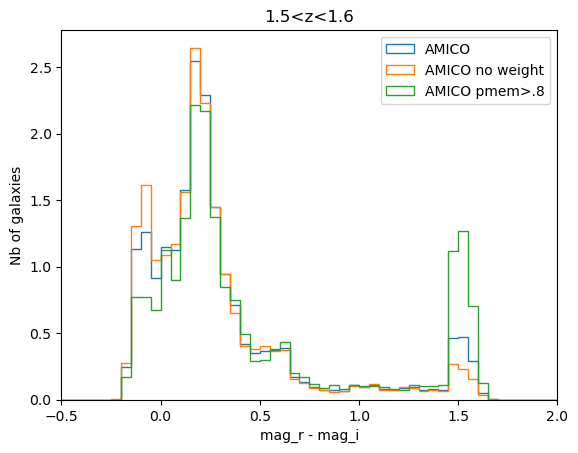

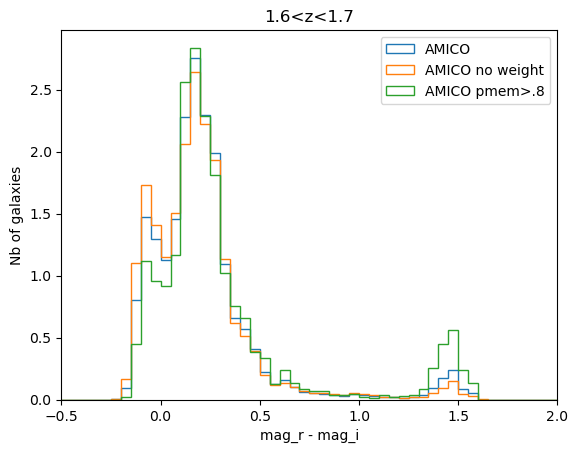

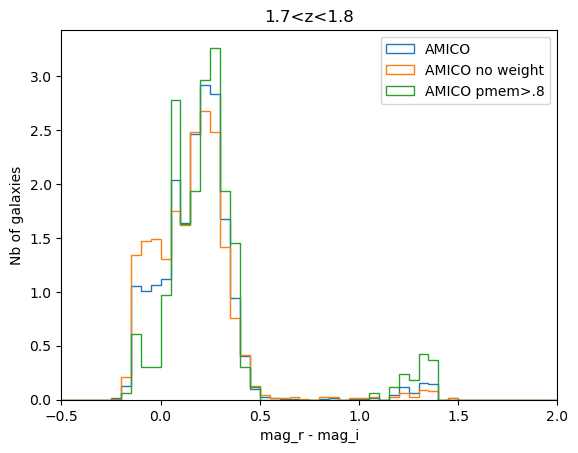

In [20]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        am_mb_cdt2 = am_mb[(am_mb['z']>=z_min)*(am_mb['z']<=z_max)]
        am_mb_delt2 = am_mb_cdt2['mag_r'] - am_mb_cdt2['mag_i']
        
        am_mb_cdt3 = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)*(am_mb_c['pmem']>.80)]
        am_mb_delt3 = am_mb_cdt3['mag_r'] - am_mb_cdt3['mag_i']

        x_bins = np.linspace(16,26,20)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO no weight', density = True)
        plt.hist(am_mb_delt3, bins = y_bins, histtype = 'step', label = 'AMICO pmem>.8', density = True)
        #plt.hist(am_mb_delt2, bins = y_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO weighted no cut', density = True)
        #cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

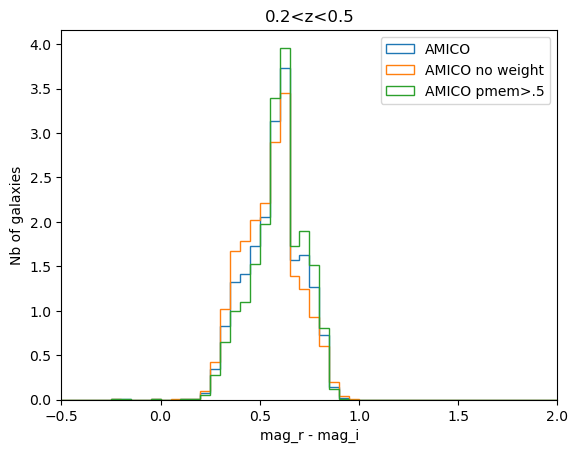

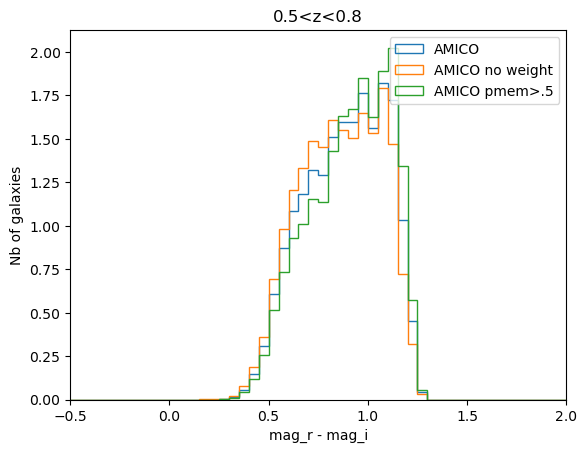

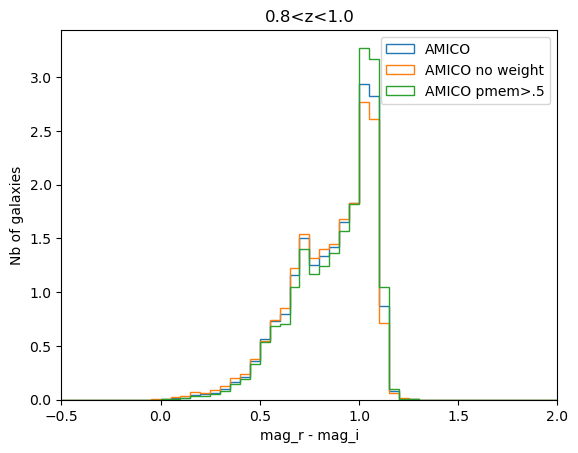

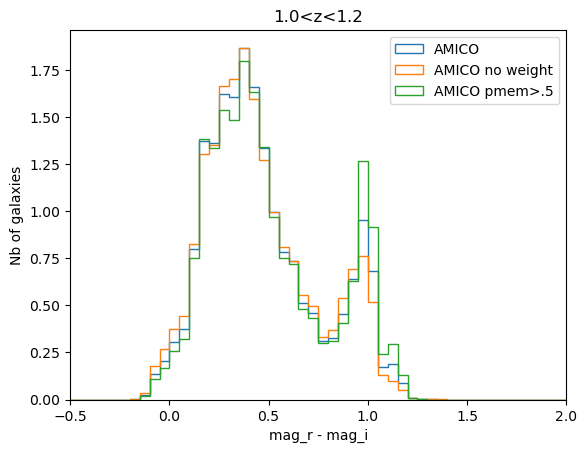

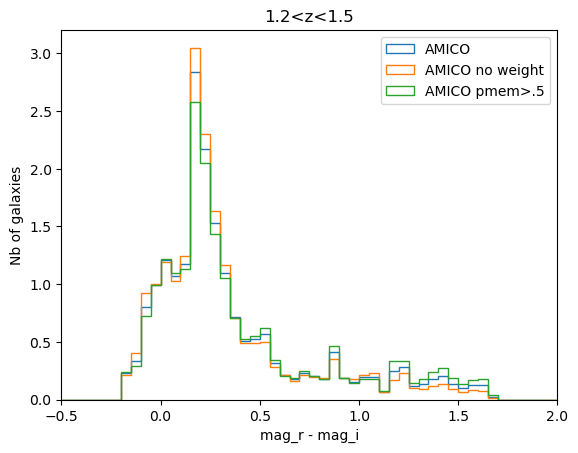

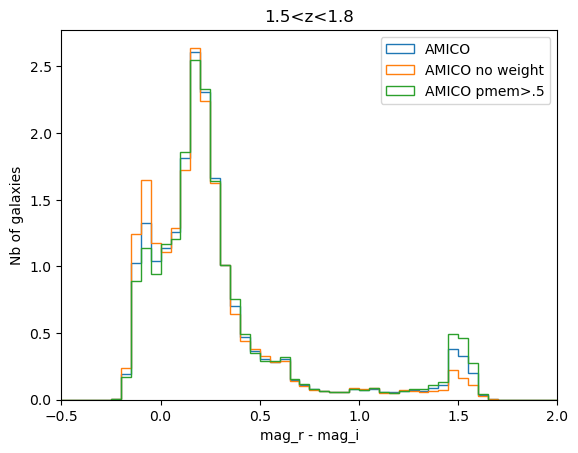

In [21]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        am_mb_cdt2 = am_mb[(am_mb['z']>=z_min)*(am_mb['z']<=z_max)]
        am_mb_delt2 = am_mb_cdt2['mag_r'] - am_mb_cdt2['mag_i']
        
        am_mb_cdt3 = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)*(am_mb_c['pmem']>.50)]
        am_mb_delt3 = am_mb_cdt3['mag_r'] - am_mb_cdt3['mag_i']

        x_bins = np.linspace(16,26,20)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO no weight', density = True)
        plt.hist(am_mb_delt3, bins = y_bins, histtype = 'step', label = 'AMICO pmem>.5', density = True)
        #plt.hist(am_mb_delt2, bins = y_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO weighted no cut', density = True)
        #cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

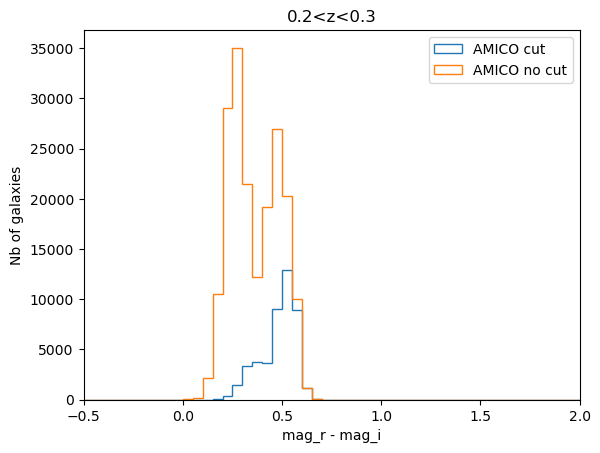

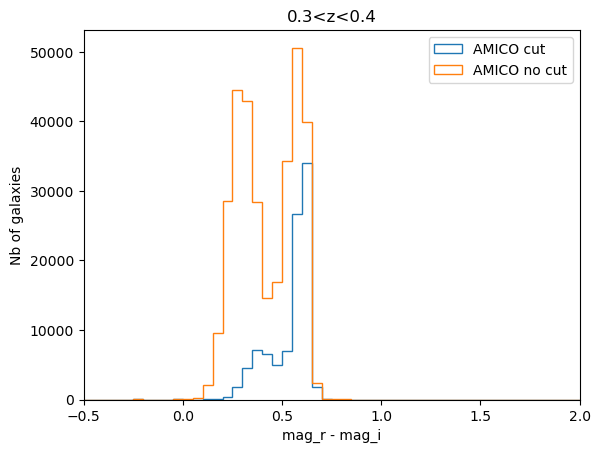

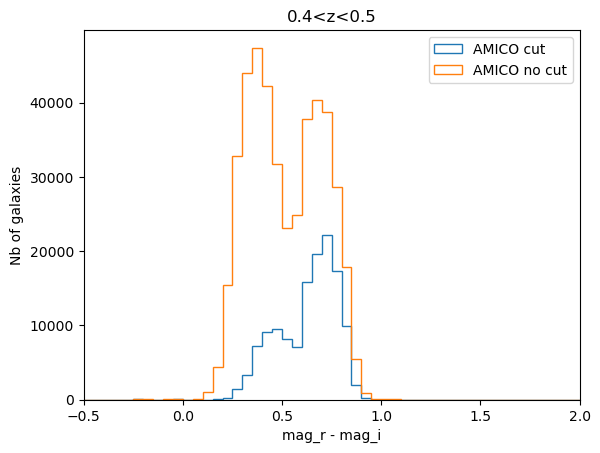

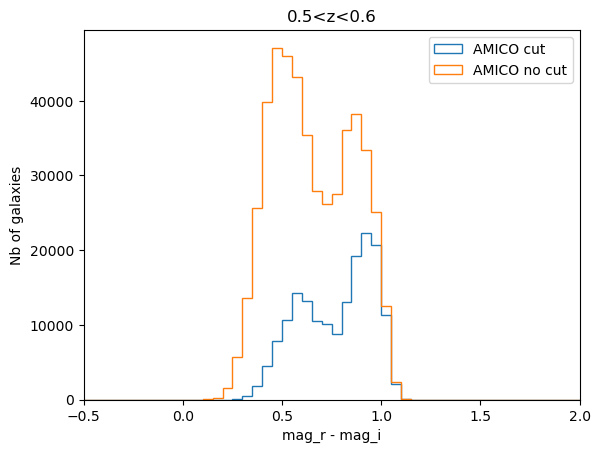

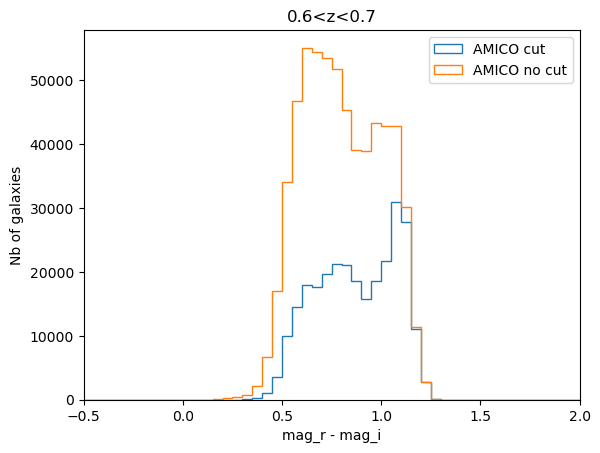

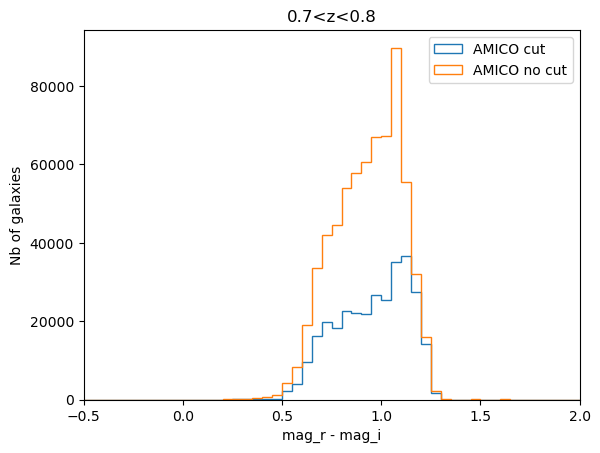

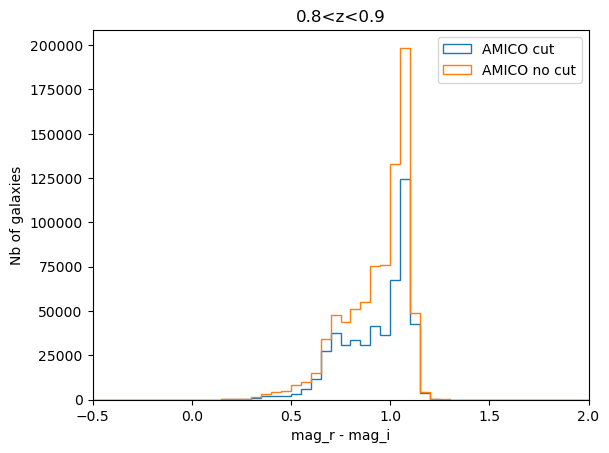

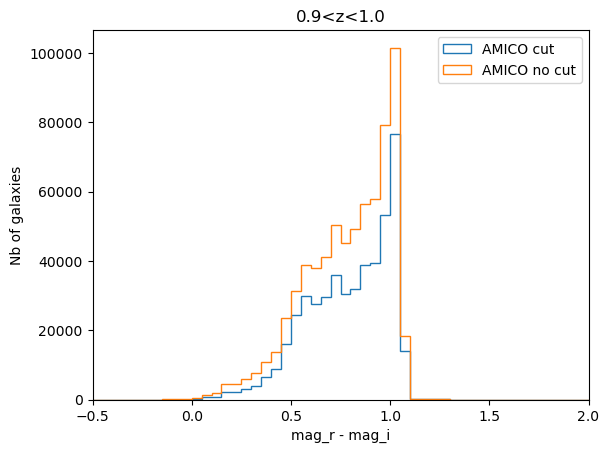

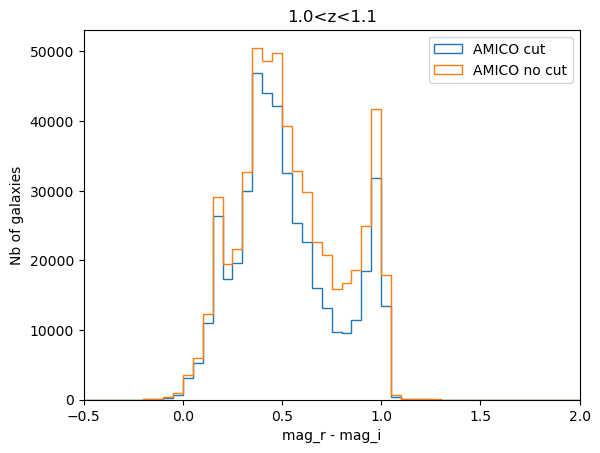

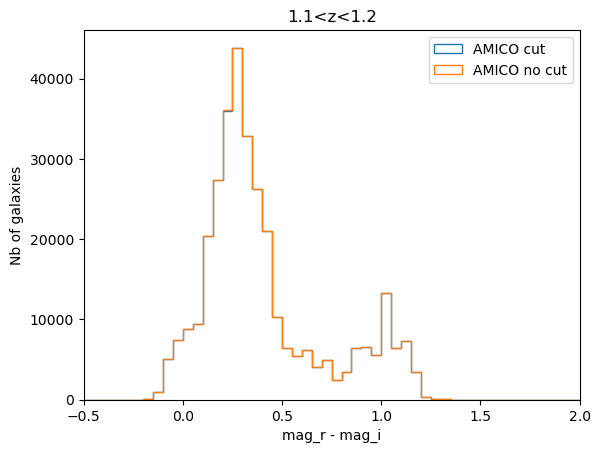

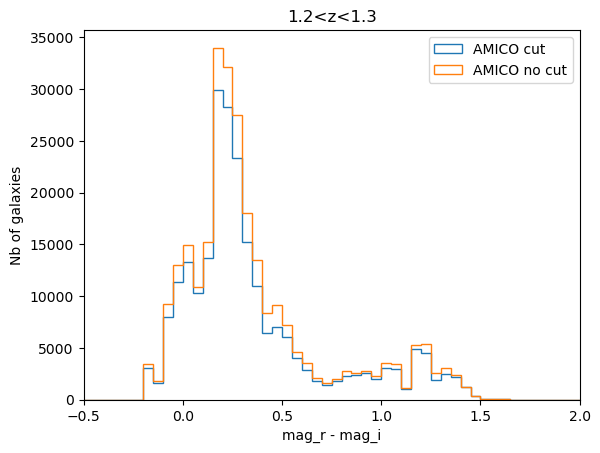

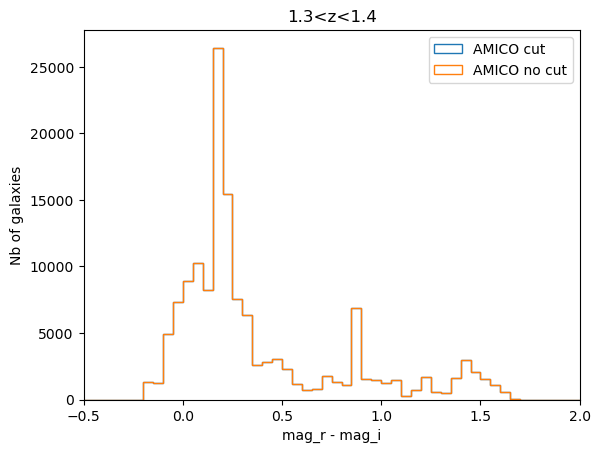

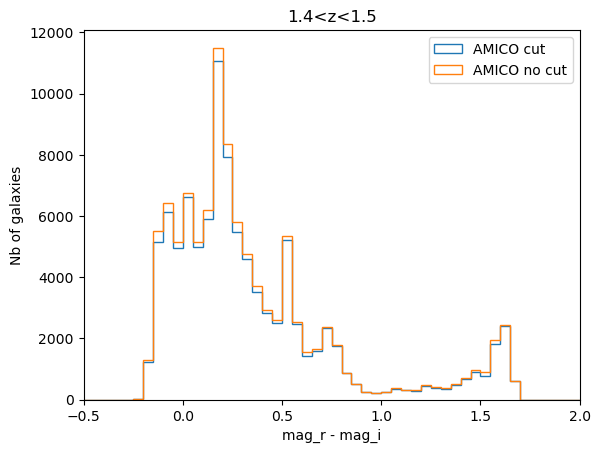

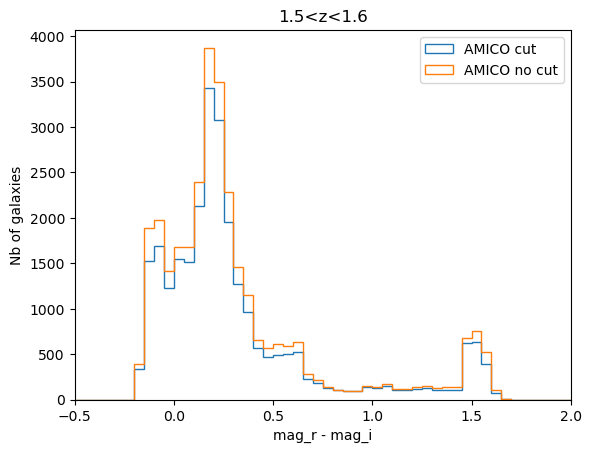

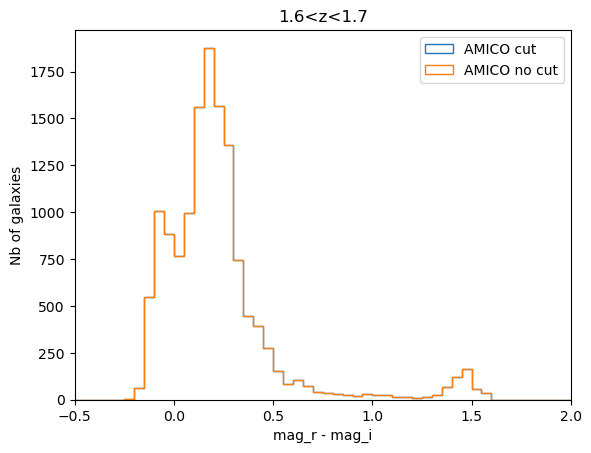

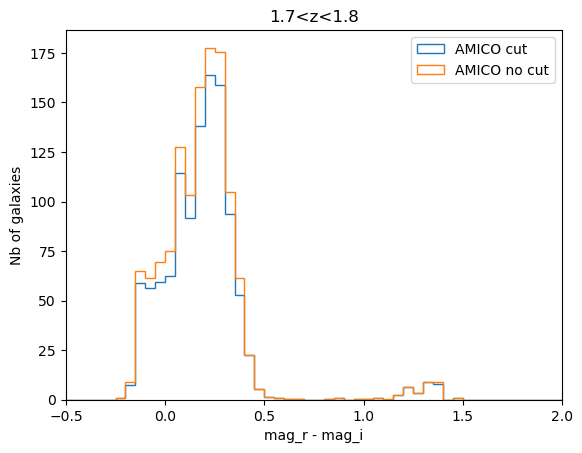

In [22]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        am_mb_cdt2 = am_mb[(am_mb['z']>=z_min)*(am_mb['z']<=z_max)]
        am_mb_delt2 = am_mb_cdt2['mag_r'] - am_mb_cdt2['mag_i']
        

        x_bins = np.linspace(16,26,20)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO cut')
        #plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO no weight', density = True)
        plt.hist(am_mb_delt2, bins = y_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO no cut')
        #cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

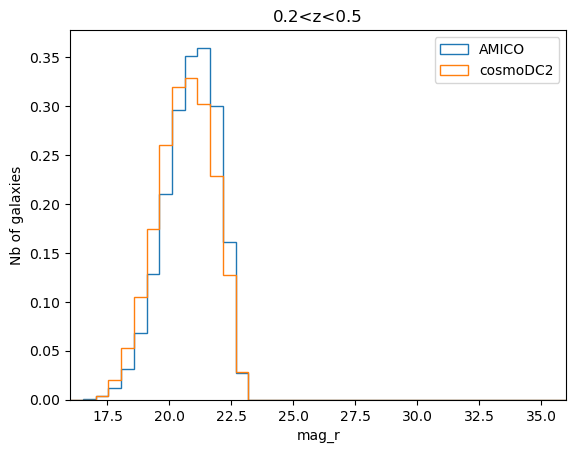

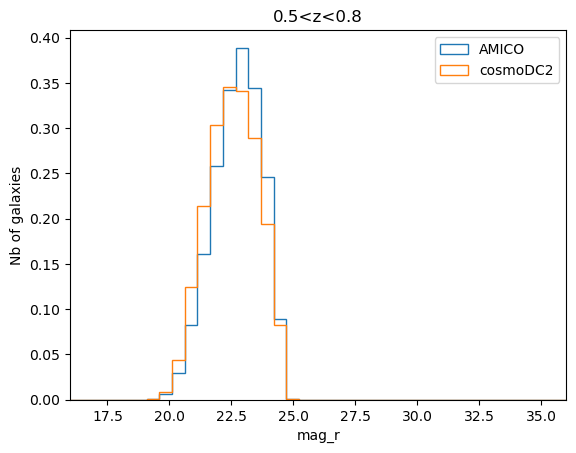

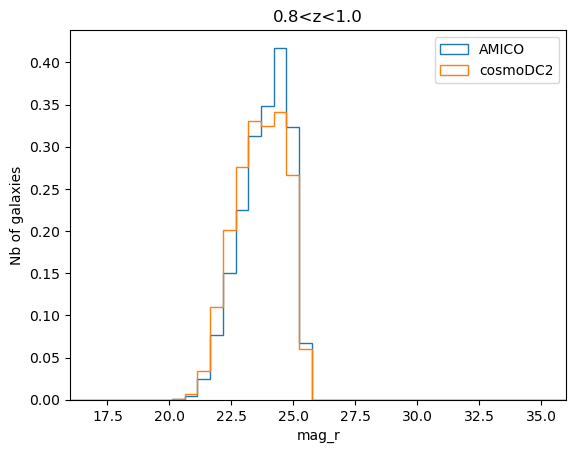

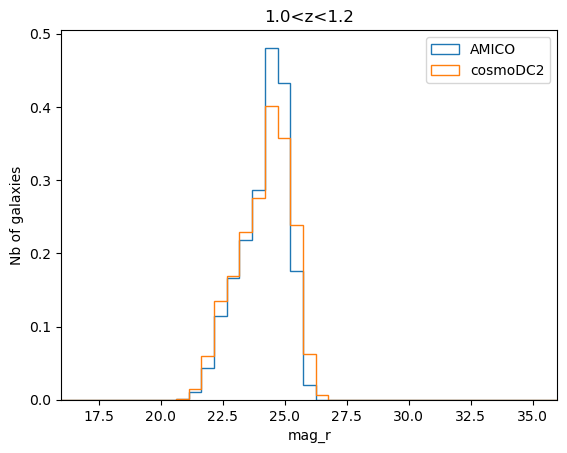

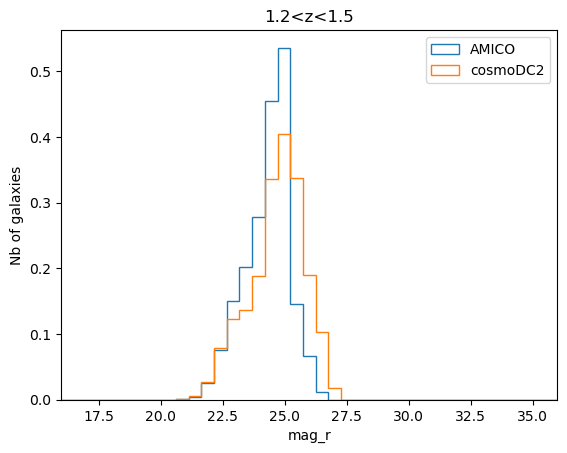

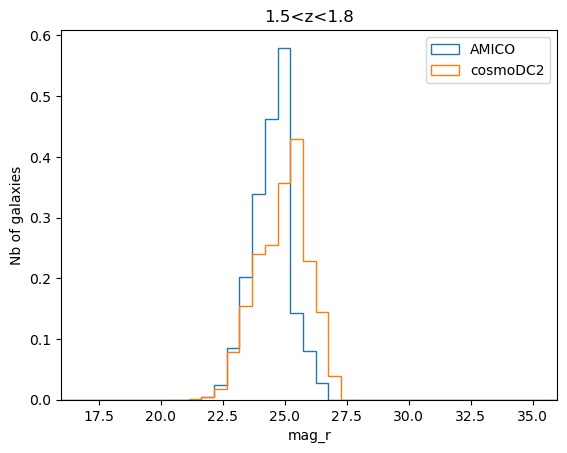

In [23]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,36,40)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_cdt['mag_r'], bins = x_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        cdc_hist = plt.hist(cdc_mb_cdt['mag_r'], bins = x_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([16,36])
        plt.show()

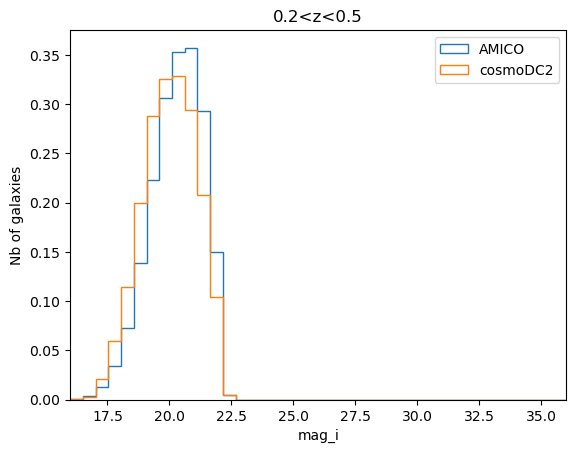

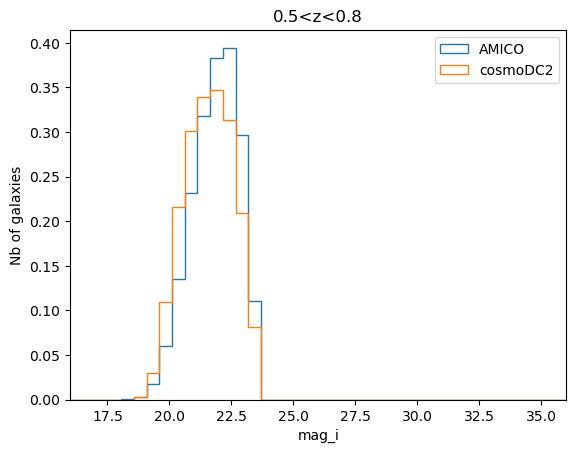

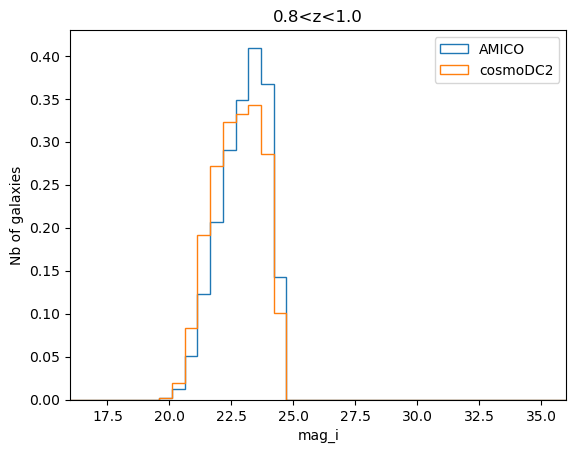

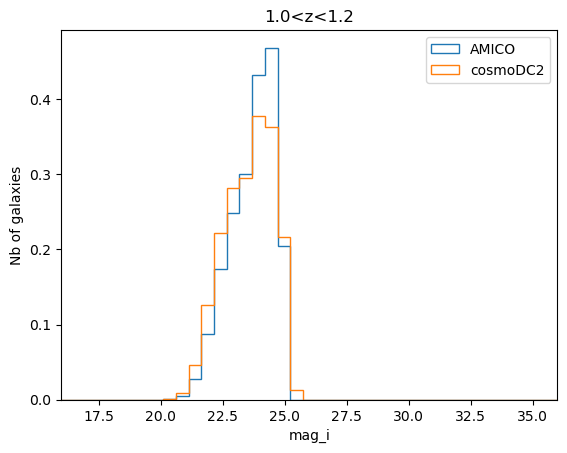

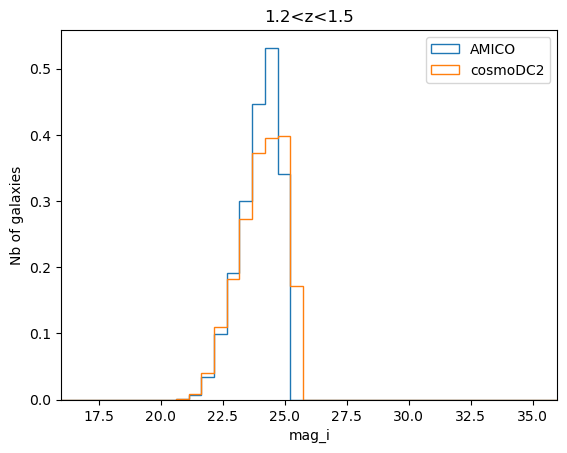

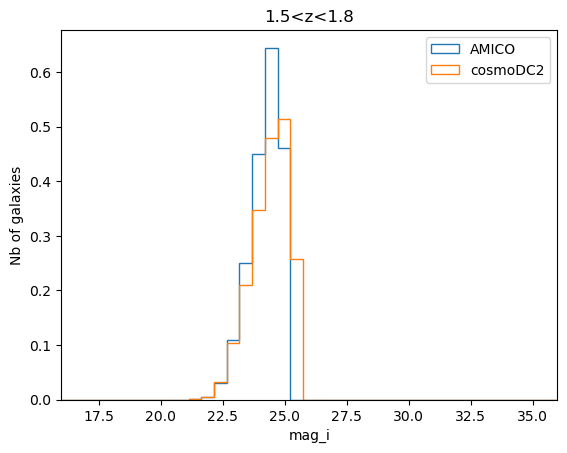

In [24]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,36,40)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_cdt['mag_i'], bins = x_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        cdc_hist = plt.hist(cdc_mb_cdt['mag_i'], bins = x_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([16,36])
        plt.show()

In [26]:
am_mb_c['delt_mag'] =  am_mb_c['mag_r'] - am_mb_c['mag_i']

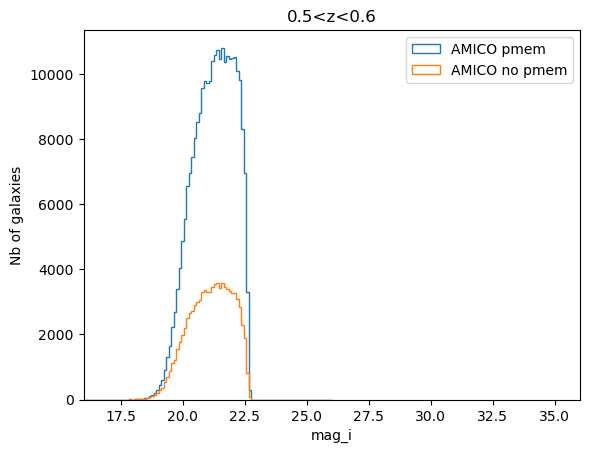

In [32]:
z_min = 0.5
z_max = 0.6
m_min = 13
m_max = 13.5

#am_mb_cdt1 = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)*(am_mb_c['delt_mag']<0.8)]
am_mb_cdt2 = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)*(am_mb_c['delt_mag']>0.8)]

x_bins = np.linspace(16,26,100)
y_bins = np.linspace(-0.5,2,51)

am_hist1 = plt.hist(am_mb_cdt2['mag_i'], bins = x_bins, histtype = 'step', label = 'AMICO pmem')
am_hist2 = plt.hist(am_mb_cdt2['mag_i'], bins = x_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO no pmem')
plt.title(str(z_min) + '<z<' + str(z_max))
plt.xlabel('mag_i')
plt.ylabel('Nb of galaxies')
plt.legend()
plt.xlim([16,36])
plt.show()